<a href="https://colab.research.google.com/github/jdeepanshu/chanceadmission/blob/main/Jamboree_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear,Ridge,Lasso Regression: Chance Of Admission


**About:**
Estimates the chances of graduate admission from an Indian perspective to help thousands of students check their probability of getting into top colleges abroad like IVY league colleges

**Column Profiling:**

- Serial No. (Unique row ID)
- GRE Scores (out of 340)
- TOEFL Scores (out of 120)
- University Rating (out of 5)
- Statement of Purpose and Letter of Recommendation Strength (out of 5)
- Undergraduate GPA (out of 10)
- Research Experience (either 0 or 1)
- Chance of Admit (ranging from 0 to 1)

**Problem Statement:**
Examine the predictor variables to extract insights on their significance in predicting graduate admission likelihood and their interrelationships.

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Scaler/Jamboree/Admission.csv')

In [4]:
df.shape

(500, 9)

In [5]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


# Data Preprocessing

In [7]:
df.rename(columns={'LOR ':'LOR', 'Chance of Admit ':'Chance of Admit'}, inplace=True)

In [8]:
df.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

No missing values in the dataset

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Serial No.,500.0,250.50000,144.481833,1.00,125.7500,250.50,375.25,500.00
GRE Score,500.0,316.47200,11.295148,290.00,308.0000,317.00,325.00,340.00
TOEFL Score,500.0,107.19200,6.081868,92.00,103.0000,107.00,112.00,120.00
University Rating,500.0,3.11400,1.143512,1.00,2.0000,3.00,4.00,5.00
SOP,500.0,3.37400,0.991004,1.00,2.5000,3.50,4.00,5.00
LOR,500.0,3.48400,0.925450,1.00,3.0000,3.50,4.00,5.00
CGPA,500.0,8.57644,0.604813,6.80,8.1275,8.56,9.04,9.92
Research,500.0,0.56000,0.496884,0.00,0.0000,1.00,1.00,1.00
Chance of Admit,500.0,0.72174,0.141140,0.34,0.6300,0.72,0.82,0.97


In [10]:
df=df.drop('Serial No.',axis=1)

In [11]:
duplicate_rows = df.duplicated()
duplicate_rows.sum()

0

No Duplicate values in the dataset

In [12]:
cols =['University Rating', 'SOP','LOR', 'Research']  #non-continous Variables

In [13]:
for item in cols:
    print("Value counts for column '{}':".format(item))
    print(df[item].value_counts())
    print()

Value counts for column 'University Rating':
3    162
2    126
4    105
5     73
1     34
Name: University Rating, dtype: int64

Value counts for column 'SOP':
4.0    89
3.5    88
3.0    80
2.5    64
4.5    63
2.0    43
5.0    42
1.5    25
1.0     6
Name: SOP, dtype: int64

Value counts for column 'LOR':
3.0    99
4.0    94
3.5    86
4.5    63
2.5    50
5.0    50
2.0    46
1.5    11
1.0     1
Name: LOR, dtype: int64

Value counts for column 'Research':
1    280
0    220
Name: Research, dtype: int64





## Exploratory Data Analysis

In [14]:
for item in cols:
  print("Value for column '{}':".format(item))
  print(df[item].value_counts(normalize=True))
  print()

Value for column 'University Rating':
3    0.324
2    0.252
4    0.210
5    0.146
1    0.068
Name: University Rating, dtype: float64

Value for column 'SOP':
4.0    0.178
3.5    0.176
3.0    0.160
2.5    0.128
4.5    0.126
2.0    0.086
5.0    0.084
1.5    0.050
1.0    0.012
Name: SOP, dtype: float64

Value for column 'LOR':
3.0    0.198
4.0    0.188
3.5    0.172
4.5    0.126
2.5    0.100
5.0    0.100
2.0    0.092
1.5    0.022
1.0    0.002
Name: LOR, dtype: float64

Value for column 'Research':
1    0.56
0    0.44
Name: Research, dtype: float64



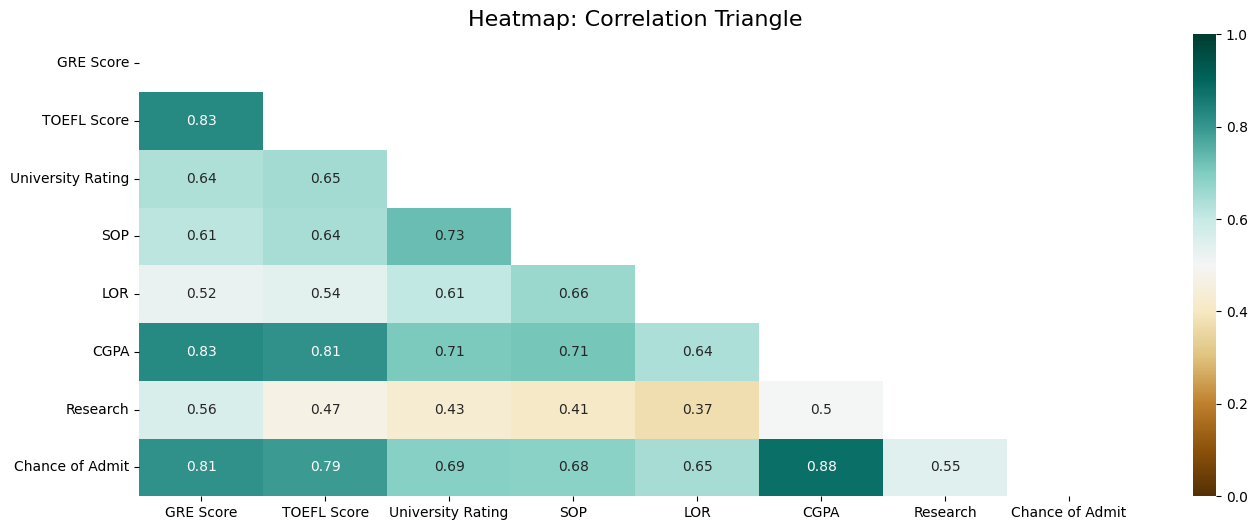

In [15]:
corr = df.corr()
plt.figure(figsize=(16,6))
mask = np.triu(np.ones_like(corr, dtype=np.bool_))
heatmap = sns.heatmap(corr, mask=mask, vmin=0, vmax=1, annot=True,cmap='BrBG')
heatmap.set_title('Heatmap: Correlation Triangle',fontdict={'fontsize':16})
plt.show()

GRE Score, TOEL Score, CGPA has high correlation

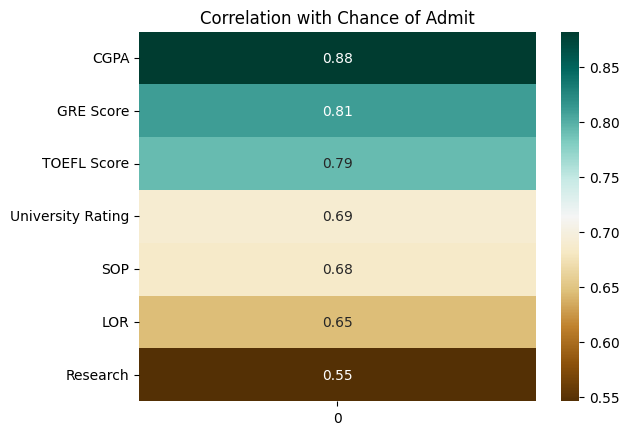

In [16]:
corr_matrix = df.corrwith(df['Chance of Admit'])
sorted_corr_matrix = corr_matrix.abs().sort_values(ascending=False)
sorted_corr_matrix =sorted_corr_matrix.iloc[1:]
sns.heatmap(sorted_corr_matrix.to_frame(), cmap="BrBG", annot=True, fmt=".2f")
plt.title("Correlation with {}".format('Chance of Admit'))
plt.show()


> **CGPA, GRE Score, Toefl Score has Highest correlation with chance of Admit**






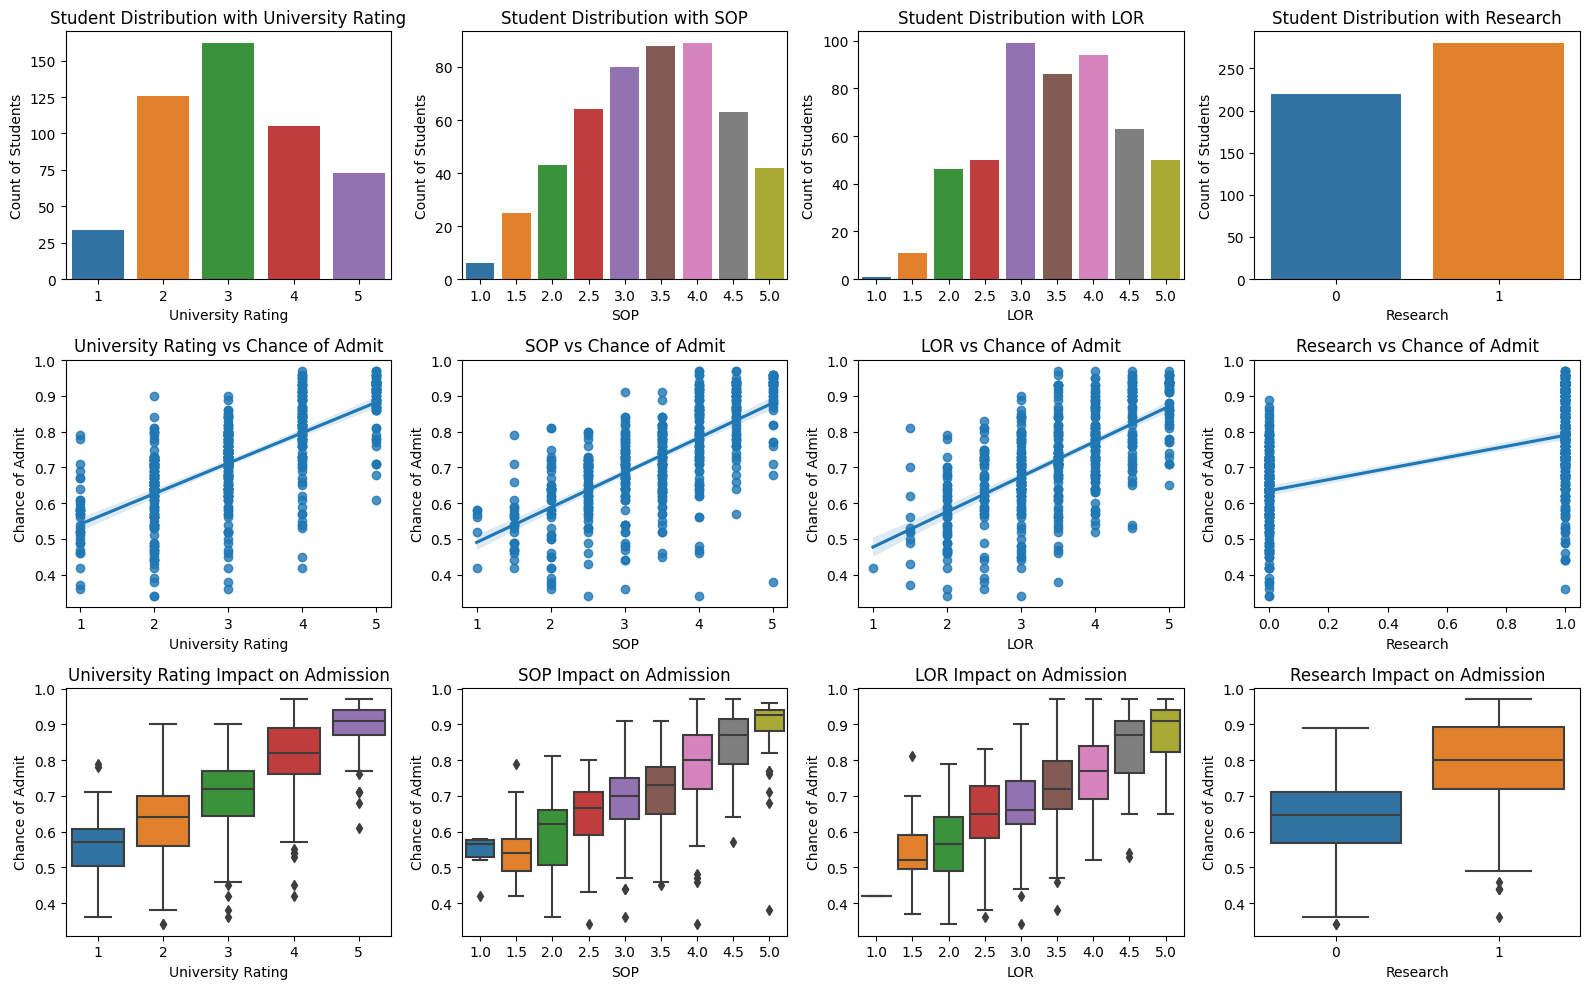

In [17]:
fig, axes = plt.subplots(3,4, figsize=(16, 10))
cols =['University Rating', 'SOP','LOR', 'Research']

for item, ax in zip(cols, axes[0, :].flatten()):
  sns.countplot(data=df,x=item, ax=ax)
  ax.set_ylabel('Count of Students')
  ax.set_title(f"Student Distribution with {item}")

for item, ax in zip(cols, axes[1, :].flatten()):
  sns.regplot(x=item,y=df['Chance of Admit'],data=df,ax=ax)
  ax.set_title(f"{item} vs Chance of Admit")

for item, ax in zip(cols, axes[2, :].flatten()):
  sns.boxplot(x=item,y=df['Chance of Admit'],data=df, ax=ax)
  ax.set_title(f"{item} Impact on Admission")

plt.tight_layout()
plt.show()

University Rating: Most Students are admitted in Rating 3 and above
SOP: Ratings of 3.5 and 4 in SOP have high chance of Admission
LOR: LOR Strength of 3 above and have high chance of Admission
Research: 55% students have done Research for high chance of Admission

Chance of Admission is increased with University Rating,SOP,LOR Strength, Research

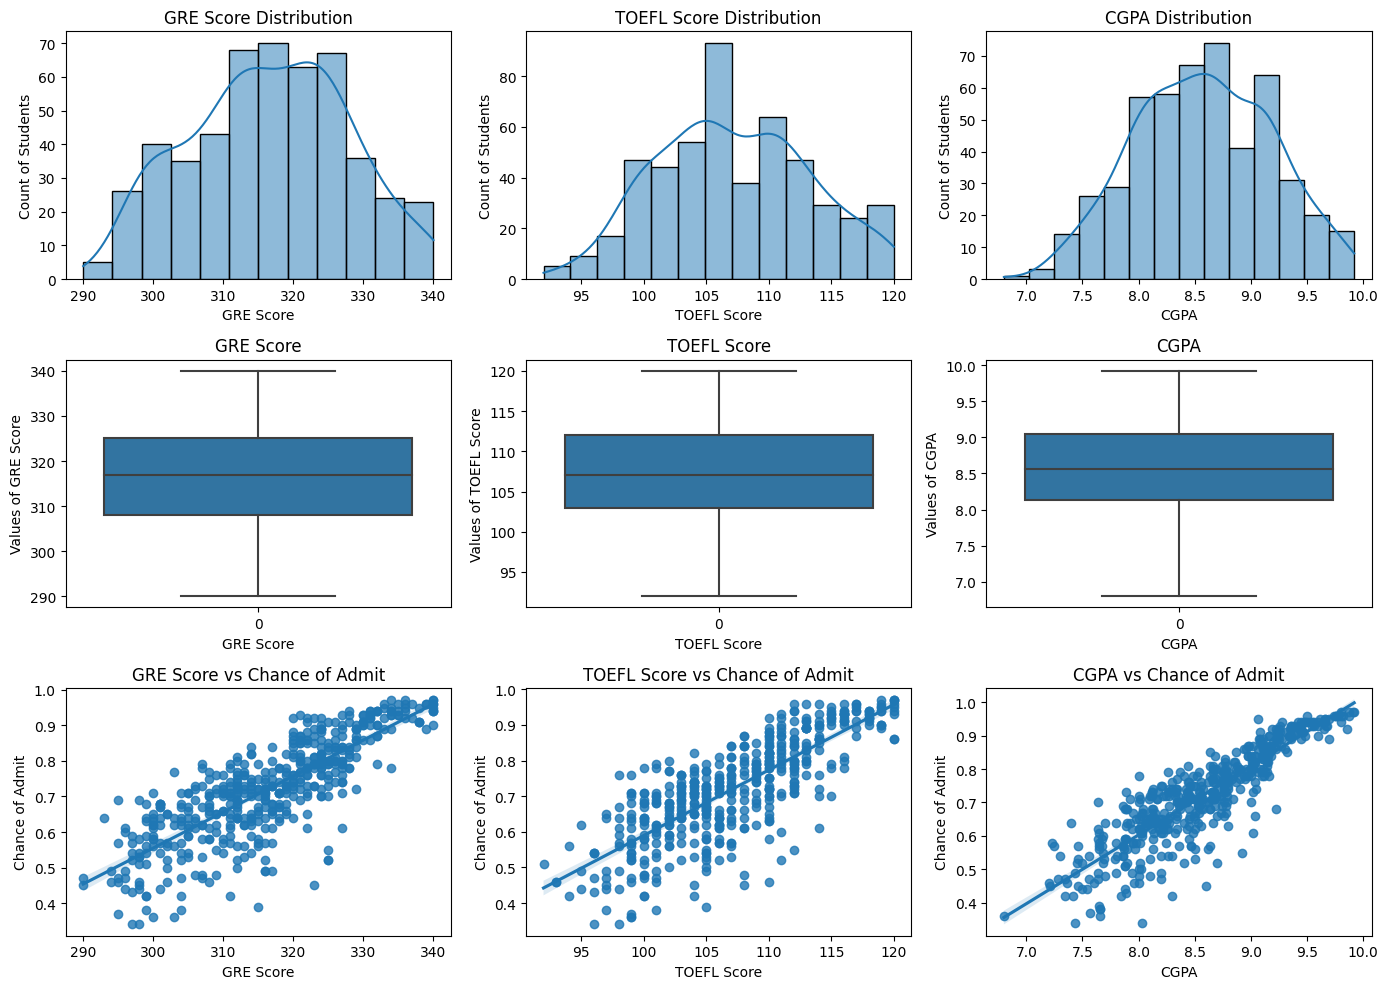

In [18]:
fig, axes = plt.subplots(3,3, figsize=(14, 10))
new_cols =['GRE Score', 'TOEFL Score', 'CGPA']


for item, ax in zip(new_cols, axes[0, :].flatten()):
    sns.histplot(data=df[item],kde=True, ax=ax)
    ax.set_title(f"{item} Distribution")
    ax.set_ylabel('Count of Students')

for item, ax in zip(new_cols, axes[1, :].flatten()):
    sns.boxplot(data=df[item], ax=ax)
    ax.set_title(f"{item}")
    ax.set_xlabel(item)
    ax.set_ylabel(f"Values of {item}")

for item, ax in zip(new_cols, axes[2, :].flatten()):
    sns.regplot(x=item,y='Chance of Admit',data=df, ax=ax)
    ax.set_title(f"{item} vs Chance of Admit")
plt.tight_layout()
plt.show()

GRE Scores,Toefl Score, CGPA have no outliers and increases the chance of admission

GRE scores typically span from 290 to 340, with the majority of students achieving scores in the 305-325.

TOEFL scores generally fall between 90 and 120,with the majority of students achieving scores in the 105-110 .

CGPA varies within the range of 7 to 10, with the majority of students scoring above 8

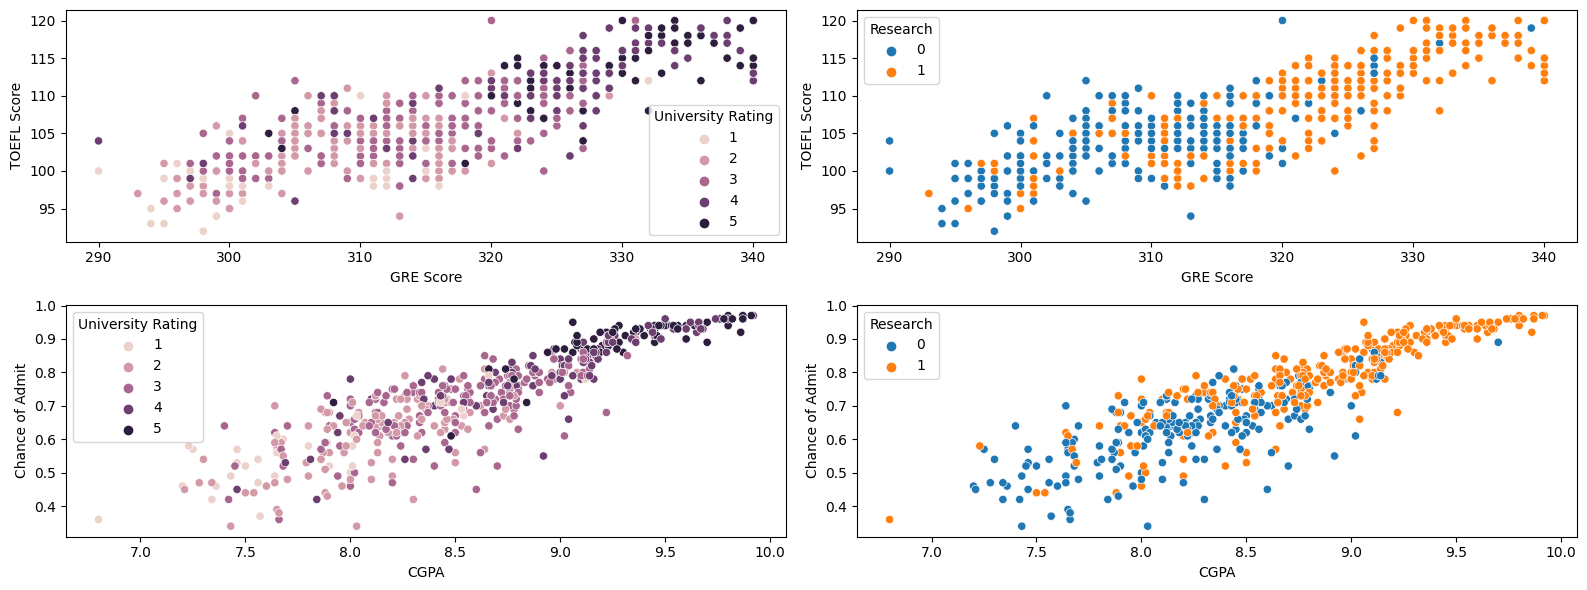

In [19]:
fig, axes = plt.subplots(2,2, figsize=(16, 6))


sns.scatterplot(x = df["GRE Score"] , y = df["TOEFL Score"] , hue = df["University Rating"], ax=axes[0,0])
sns.scatterplot(x = df["CGPA"] , y = df["Chance of Admit"] , hue = df["University Rating"],ax=axes[1,0])

sns.scatterplot(x = df["GRE Score"] , y = df["TOEFL Score"] , hue = df["Research"], ax=axes[0,1])
sns.scatterplot(x = df["CGPA"] , y = df["Chance of Admit"] , hue = df["Research"],ax=axes[1,1])

plt.tight_layout()
plt.show()


# Data preparation for modeling

In [20]:
#Import sklearn libraries
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
#Import metrics from sklearn
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [21]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [22]:
X = df.drop(['Chance of Admit'],axis=1)
y = df['Chance of Admit']

In [23]:
scaler = StandardScaler()
X_scaled=scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [24]:
X_scaled.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1.819238,1.778865,0.775582,1.137360,1.098944,1.776806,0.886405
1,0.667148,-0.031601,0.775582,0.632315,1.098944,0.485859,0.886405
2,-0.041830,-0.525364,-0.099793,-0.377773,0.017306,-0.954043,0.886405
3,0.489904,0.462163,-0.099793,0.127271,-1.064332,0.154847,0.886405
4,-0.219074,-0.689952,-0.975168,-1.387862,-0.523513,-0.606480,-1.128152


In [25]:
y.head()

0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Chance of Admit, dtype: float64

In [26]:
#Split the data into train and test dataset

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=2)

In [27]:

#Print shape of train and test datasets
print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of X_test: {X_test.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of y_test: {y_test.shape}')

Shape of X_train: (400, 7)
Shape of X_test: (100, 7)
Shape of y_train: (400,)
Shape of y_test: (100,)


# Linear Regression

In [28]:

LR = LinearRegression()
LR.fit(X_train, y_train)
y_pred_train = LR.predict(X_train)
y_pred_test = LR.predict(X_test)

In [29]:
#Import metrics from sklearn

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [30]:
# Evaluating the model using multiple loss functions
def get_metrics(y_actual, y_forecast, model):
  n = len(y_actual)
  if len(model.coef_.shape)==1:
    p = len(model.coef_)
  else:
    p = len(model.coef_[0])
  MAE = np.round(mean_absolute_error(y_true=y_actual, y_pred=y_forecast),2)
  RMSE = np.round(mean_squared_error(y_true=y_actual,
                                     y_pred=y_forecast, squared=False),2)
  r2 = np.round(r2_score(y_true=y_actual, y_pred=y_forecast),2)
  adj_r2 = np.round(1 - ((1-r2)*(n-1)/(n-p-1)),2)
  return print(f"MAE: {MAE}\nRMSE: {RMSE}\nR2 Score: {r2}\nAdjusted R2: {adj_r2}")

In [31]:
get_metrics(y_train.values, y_pred_train, LR)

MAE: 0.04
RMSE: 0.06
R2 Score: 0.83
Adjusted R2: 0.83


In [32]:
get_metrics(y_test.values, y_pred_test, LR)

MAE: 0.05
RMSE: 0.07
R2 Score: 0.79
Adjusted R2: 0.77


In [33]:
coef = list(zip(X_train.columns,LR.coef_.round(4)))
# Model Coefficients
print('ModelCoefficients: ')
for i in range(len(coef)):
    print("Weight of", coef[i][0],' = ',coef[i][1])

ModelCoefficients: 
Weight of GRE Score  =  0.0241
Weight of TOEFL Score  =  0.0179
Weight of University Rating  =  0.0055
Weight of SOP  =  0.0021
Weight of LOR  =  0.0172
Weight of CGPA  =  0.0685
Weight of Research  =  0.0123


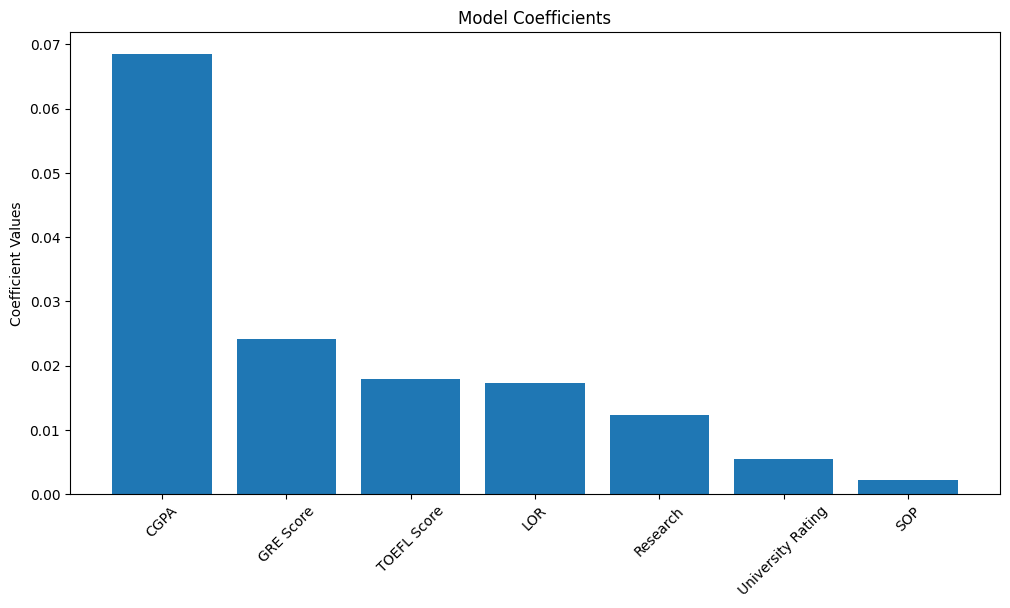

In [34]:
# Plot model coefficients
coef.sort(key=lambda x:x[1], reverse=True)
plt.figure(figsize=(12,6))
plt.bar([x[0] for x in coef], [x[1] for x in coef])
plt.xticks(rotation=45)
plt.ylabel('Coefficient Values')
plt.title('Model Coefficients')
plt.show()

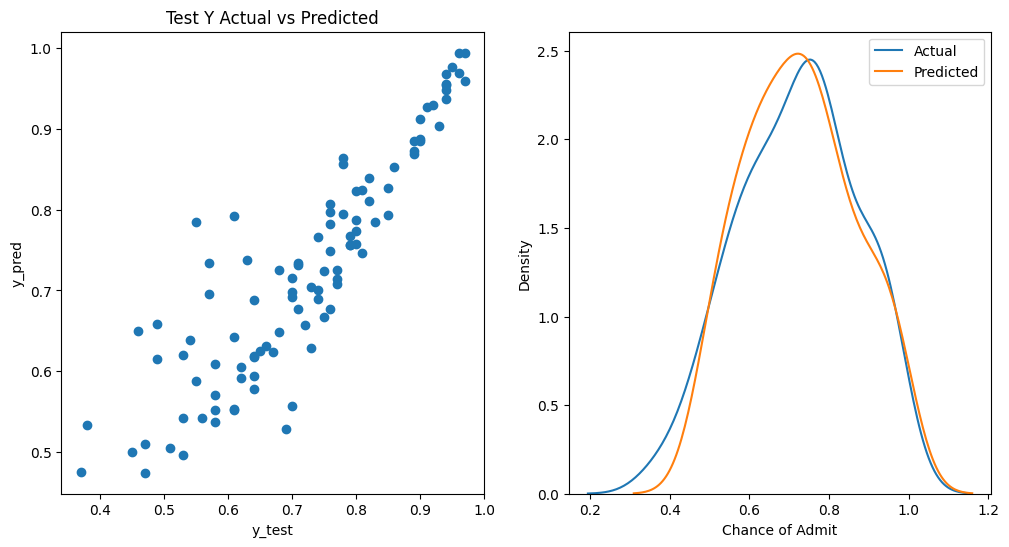

In [35]:
fig, axes = plt.subplots(1,2, figsize=(12, 6))

# Test Y Actual vs Predicted
axes[0].scatter(y_test, y_pred_test)
axes[0].set_title("Test Y Actual vs Predicted")
axes[0].set_xlabel('y_test')
axes[0].set_ylabel('y_pred')

# Actual vs Predicted KDE plot
sns.kdeplot(y_test,label ='Actual',ax =axes[1])
sns.kdeplot(y_pred_test, label ='Predicted',ax =axes[1])
axes[1].legend()

plt.show()

In [36]:
X_test

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
129,1.464749,1.778865,1.650957,1.642404,1.639763,1.280288,0.886405
280,-0.484941,-0.854540,-0.099793,1.137360,0.558125,0.105196,0.886405
440,-1.016674,-0.525364,-0.975168,-0.882817,-2.145970,-1.301605,-1.128152
384,2.085104,0.955926,0.775582,1.642404,1.639763,1.925762,0.886405
225,-1.814275,-1.348304,-0.975168,-0.882817,-1.064332,-0.904391,-1.128152
...,...,...,...,...,...,...,...
387,-0.839430,-0.360777,-0.975168,-1.387862,0.017306,-0.788537,-1.128152
117,-2.346008,-0.525364,0.775582,-1.387862,-1.064332,-1.847775,-1.128152
468,0.578526,0.462163,0.775582,0.632315,1.639763,0.502410,0.886405
395,0.667148,0.462163,-0.099793,0.127271,0.017306,0.767220,0.886405


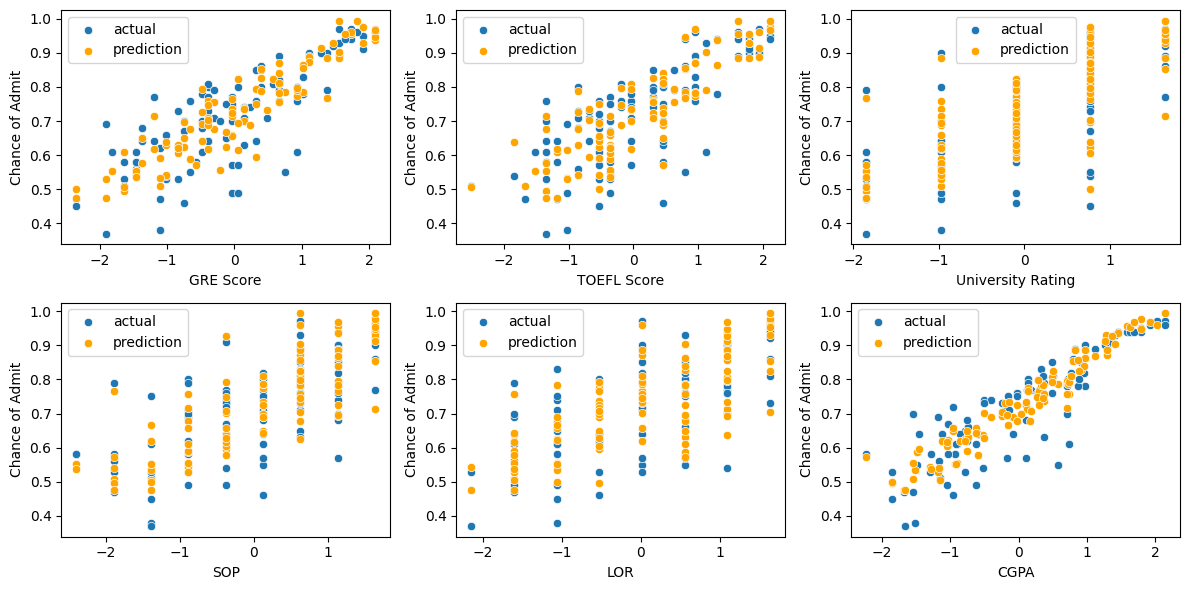

In [37]:
plt.figure(figsize=(12,6))
i=1

for col in X_test.columns[:-1]:
  ax = plt.subplot(2,3,i)
  sns.scatterplot(x=X_test[col], y=y_test,label='actual')
  sns.scatterplot(x=X_test[col], y=y_pred_test,color='orange',label='prediction')
  plt.xlabel(col)
  i+=1

plt.tight_layout()
plt.show();

In [38]:
intercept = LR.intercept_.round(4)
print(f'Intercept: {intercept}')

Intercept: 0.723


# Ridge Regression

In [39]:
X_train.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research'],
      dtype='object')

In [40]:
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
428,-0.041830,-0.689952,-0.975168,-1.387862,1.098944,0.270702,-1.128152
490,-0.839430,-0.360777,-0.975168,-0.882817,1.098944,-0.755436,0.886405
53,0.667148,0.791338,0.775582,0.632315,-1.064332,-0.788537,0.886405
336,0.224037,0.462163,-0.099793,-0.377773,-1.064332,0.353455,-1.128152
154,0.844393,0.132987,-0.099793,-0.377773,0.017306,0.518961,-1.128152
...,...,...,...,...,...,...,...
22,1.021637,1.449690,1.650957,1.642404,1.639763,1.528547,0.886405
72,0.401282,0.626751,1.650957,1.642404,1.639763,1.445794,0.886405
493,-1.459786,-2.006655,-0.975168,-0.377773,-2.145970,-0.589930,0.886405
15,-0.219074,-0.360777,-0.099793,0.127271,-1.064332,-0.457525,-1.128152


In [41]:
y_train

428    0.69
490    0.67
53     0.72
336    0.72
154    0.80
       ... 
22     0.94
72     0.93
493    0.62
15     0.54
168    0.64
Name: Chance of Admit, Length: 400, dtype: float64

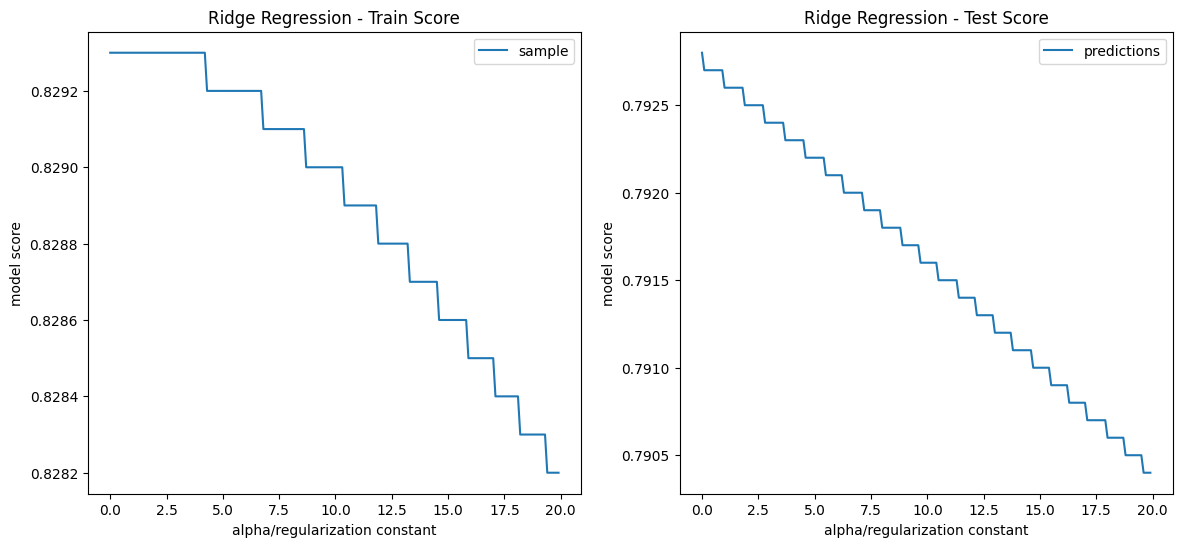

In [42]:
train_score = []
test_score = []
for a in np.arange(0,20,0.1):
    clf = Ridge(alpha=a)
    clf.fit(X_train, y_train)
    train_score.append(clf.score(X_train, y_train).round(4))
    test_score.append(clf.score(X_test, y_test).round(4))

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.plot(np.arange(0,20,0.1), train_score, label='sample')
plt.xlabel('alpha/regularization constant')
plt.ylabel('model score')
plt.legend()
plt.title('Ridge Regression - Train Score')
plt.subplot(1,2,2)
plt.plot(np.arange(0,20,0.1), test_score, label='predictions')
plt.xlabel('alpha/regularization constant')
plt.ylabel('model score')
plt.legend()
plt.title('Ridge Regression - Test Score')
plt.show()


In [43]:
print(f'Best alpha: {np.arange(0,10,0.1)[np.argmax(test_score)]}')
print(f'Max Train score: {train_score[np.argmax(train_score)]}')
print(f'Max Test score: {test_score[np.argmax(test_score)]}')

Best alpha: 0.0
Max Train score: 0.8293
Max Test score: 0.7928


# Lasso Regression

<ipython-input-44-50bd04658555>:5: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  clf.fit(X_train, y_train)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.659e-01, tolerance: 7.803e-04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


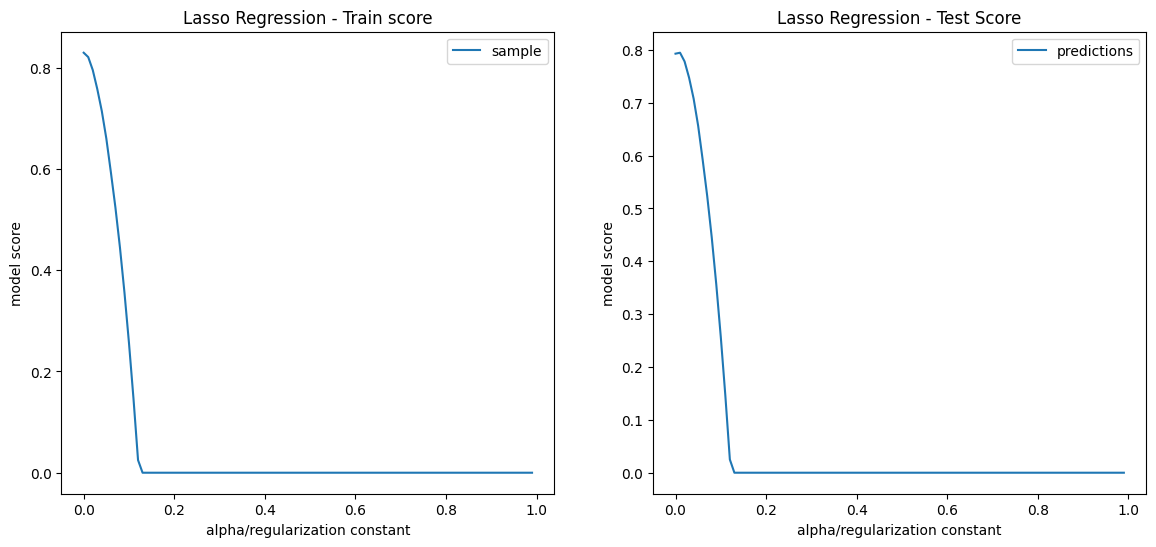

In [44]:
train_score = []
test_score = []
for a in np.arange(0,1,0.01):
    clf = Lasso(alpha=a)
    clf.fit(X_train, y_train)
    train_score.append(clf.score(X_train, y_train).round(4))
    test_score.append(clf.score(X_test, y_test).round(4))

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.plot(np.arange(0,1,0.01), train_score, label='sample')
plt.xlabel('alpha/regularization constant')
plt.ylabel('model score')
plt.legend()
plt.title('Lasso Regression - Train score')
plt.subplot(1,2,2)
plt.plot(np.arange(0,1,0.01), test_score, label='predictions')
plt.xlabel('alpha/regularization constant')
plt.ylabel('model score')
plt.legend()
plt.title('Lasso Regression - Test Score')
plt.show()


In [45]:

print(f'Best alpha: {np.arange(0,1,0.01)[np.argmax(test_score)]}')
print(f'Max Train score: {train_score[np.argmax(train_score)]}')
print(f'Max Test score: {test_score[np.argmax(test_score)]}')

Best alpha: 0.01
Max Train score: 0.8293
Max Test score: 0.7946


# Assumptions of the  **linear regression model**

### Multicollinearity check by VIF score

In [46]:
# VIF (Variance Inflation Factor)
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [47]:
def vif(X):
  vif = pd.DataFrame()
  vif['Variable'] = X.columns
  vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
  vif['VIF'] = round(vif['VIF'], 2)
  vif = vif.sort_values(by = "VIF", ascending = False)
  return vif


In [48]:
new_x=X

In [49]:
vif(new_x)

,Variable,VIF
0,GRE Score,1308.06
1,TOEFL Score,1215.95
5,CGPA,950.82
3,SOP,35.27
4,LOR,30.91
2,University Rating,20.93
6,Research,2.87


In [50]:

#Dropping GRE Score and re-check VIF for all other features

vif(new_x.drop(['GRE Score'], axis=1))

,Variable,VIF
4,CGPA,728.78
0,TOEFL Score,639.74
2,SOP,33.73
3,LOR,30.63
1,University Rating,19.88
5,Research,2.86


In [51]:

#Dropping CGPA and re-check VIF for all other features

vif(new_x.drop(['GRE Score','CGPA'],axis=1))

,Variable,VIF
2,SOP,33.27
3,LOR,29.53
0,TOEFL Score,22.04
1,University Rating,19.75
4,Research,2.85


In [52]:
#Dropping SOP and re-check VIF for remaining features

vif(new_x.drop(['GRE Score','CGPA','SOP'],axis=1))

,Variable,VIF
2,LOR,25.70
0,TOEFL Score,19.84
1,University Rating,14.95
3,Research,2.82


In [53]:
#Dropping LOR and re-check VIF for remaining features

vif(new_x.drop(['GRE Score','CGPA','SOP','LOR'],axis=1))

,Variable,VIF
1,University Rating,11.84
0,TOEFL Score,10.26
2,Research,2.78


In [54]:

#Dropping Univerity Rating and re-check VIF for remaining features

vif(new_x.drop(['GRE Score','CGPA','SOP','LOR','University Rating'],axis=1))

,Variable,VIF
0,TOEFL Score,2.41
1,Research,2.41


In [55]:
new_x2 = new_x.drop(['GRE Score','TOEFL Score'],axis=1)
new_x2.head()

,University Rating,SOP,LOR,CGPA,Research
0,4,4.5,4.5,9.65,1
1,4,4.0,4.5,8.87,1
2,3,3.0,3.5,8.00,1
3,3,3.5,2.5,8.67,1
4,2,2.0,3.0,8.21,0


#### Linear Regression after dropping variables using VIf



In [56]:
X_train, X_test, y_train, y_test = train_test_split(new_x2, y, test_size=0.20, random_state=2)

In [57]:

#Print shape of train and test datasets
print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of X_test: {X_test.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of y_test: {y_test.shape}')

Shape of X_train: (400, 5)
Shape of X_test: (100, 5)
Shape of y_train: (400,)
Shape of y_test: (100,)


In [58]:
LR = LinearRegression()
LR.fit(X_train, y_train)
y_pred_train = LR.predict(X_train)
y_pred_test = LR.predict(X_test)

In [59]:
get_metrics(y_train.values, y_pred_train, LR)

MAE: 0.04
RMSE: 0.06
R2 Score: 0.81
Adjusted R2: 0.81


In [60]:
get_metrics(y_test.values, y_pred_test, LR)

MAE: 0.05
RMSE: 0.07
R2 Score: 0.79
Adjusted R2: 0.78


In [61]:
coef = list(zip(X_train.columns,LR.coef_.round(4)))
# Model Coefficients
print('ModelCoefficients: ')
for i in range(len(coef)):
    print("Weight of", coef[i][0],' = ',coef[i][1])

ModelCoefficients: 
Weight of University Rating  =  0.0083
Weight of SOP  =  0.0048
Weight of LOR  =  0.0166
Weight of CGPA  =  0.1599
Weight of Research  =  0.0347


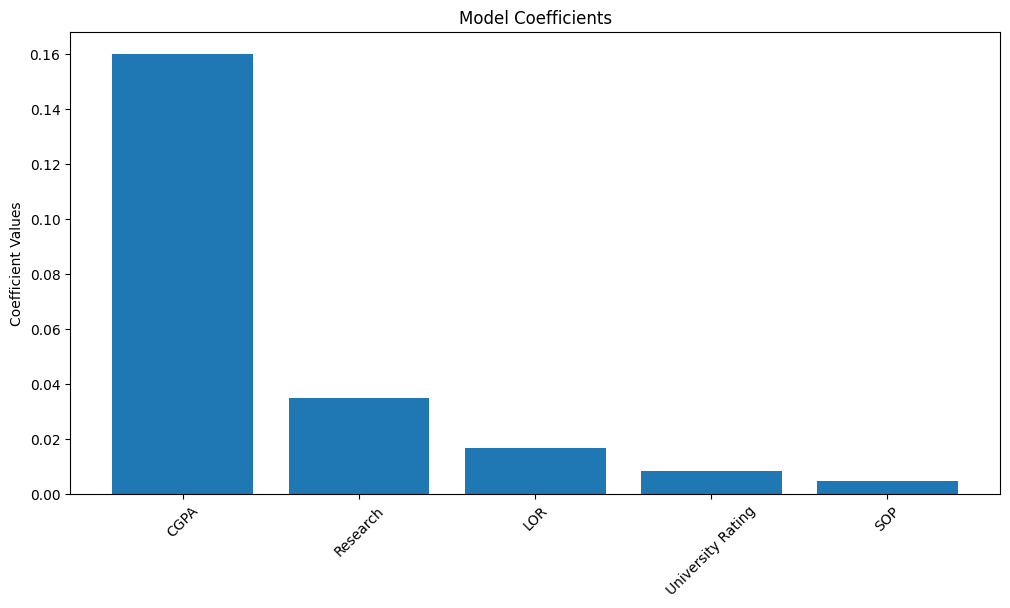

In [62]:
# Plot model coefficients
coef.sort(key=lambda x:x[1], reverse=True)
plt.figure(figsize=(12,6))
plt.bar([x[0] for x in coef], [x[1] for x in coef])
plt.xticks(rotation=45)
plt.ylabel('Coefficient Values')
plt.title('Model Coefficients')
plt.show()

### Mean of residuals and Linearity of variables


In [63]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=2)

In [64]:
residuals = y_test.values - y_pred_test
residuals.reshape((-1,))
print('Mean of Residuals: ', residuals.mean())

Mean of Residuals:  -0.005418197883325903


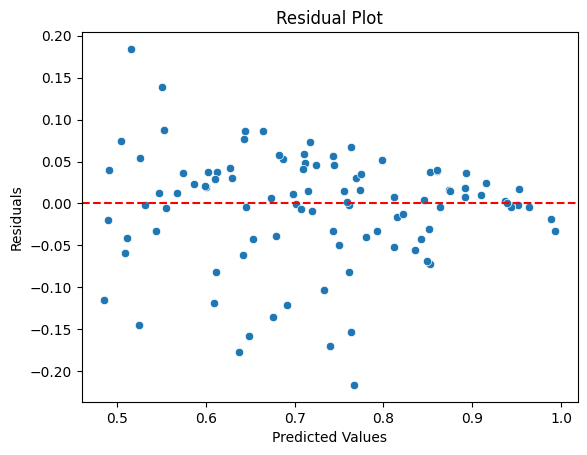

In [65]:
sns.scatterplot(x = y_pred_test.reshape((-1,)), y=residuals.reshape((-1,)))
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show();

### Test for Homoscedasticity

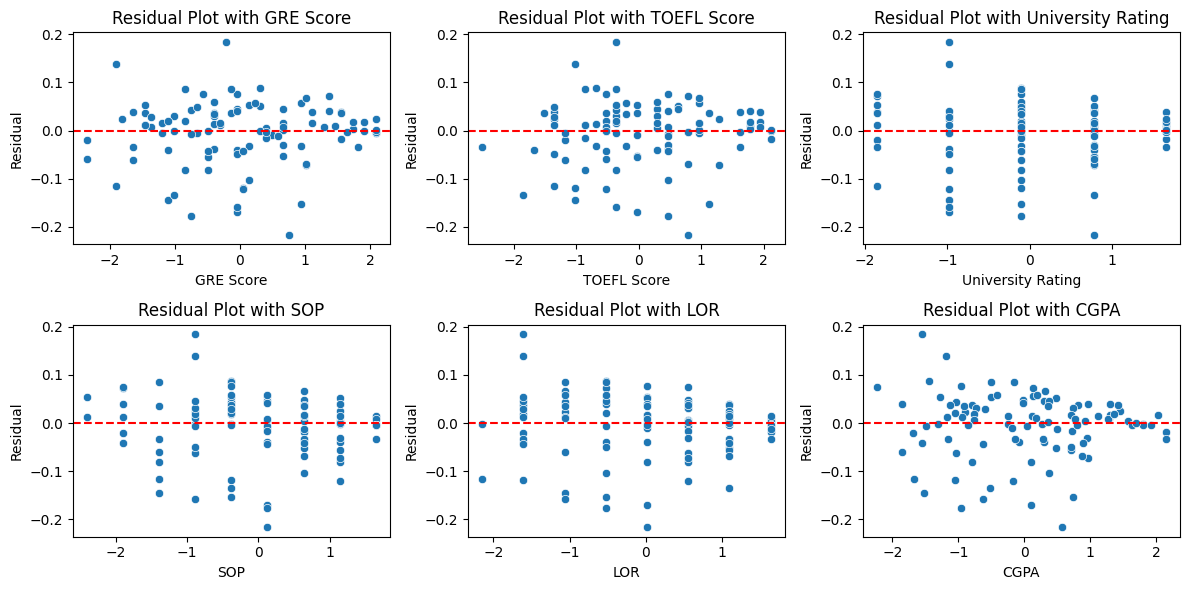

In [66]:
plt.figure(figsize=(12,6))
i=1
for col in X_test.columns[:-1]:
  ax = plt.subplot(2,3,i)
  sns.scatterplot(x=X_test[col].values.reshape((-1,)), y=residuals.reshape((-1,)))
  plt.title(f'Residual Plot with {col}')
  plt.xlabel(col)
  plt.ylabel('Residual')
  plt.axhline(y=0, color='r', linestyle='--')
  i+=1

plt.tight_layout()
plt.show();

### Normality of residuals

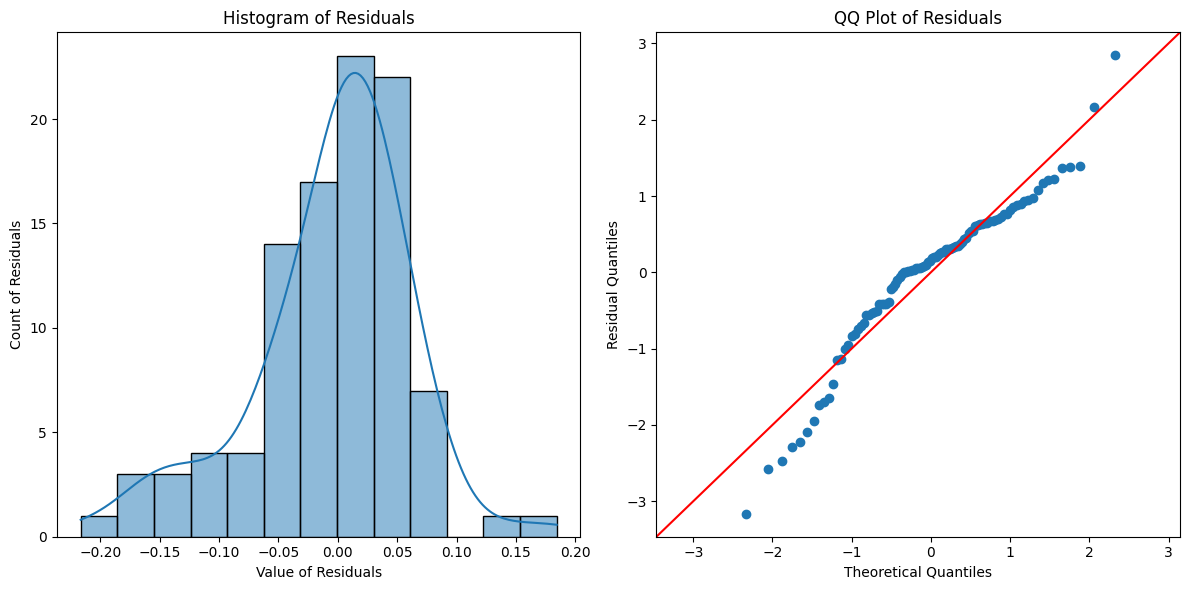

In [67]:
fig, axes = plt.subplots(1,2, figsize=(12, 6))

# Histogram of residuals
sns.histplot(residuals.reshape((-1,)), kde=True, ax=axes[0])
axes[0].set_title("Histogram of Residuals")
axes[0].set_xlabel('Value of Residuals')
axes[0].set_ylabel('Count of Residuals')


# QQ-Plot of residuals
sm.qqplot(residuals.reshape((-1,)),fit=True,line='45',ax=axes[1])
axes[1].set_title('QQ Plot of Residuals')
axes[1].set_ylabel('Residual Quantiles')

plt.tight_layout()
plt.show();